# Pymaceuticals Inc.
---

### Analysis

- The study researching on how different drugs and treatments have in different subjects with different body weights. There was however, a higher male samples vs females at 51% to 49%.
- Capomulin and Ramicane appeared to be the most effeective in shrinking tumor sizes for patients but they also effected the metastatic spread. Increasing it ever so slightly. Especially with patients of higher body weight. Capomulin did show great promise for lower volume of tumors as the timepoint/days  increased but further studies would need to be conducted. This research could also be indicitive by the large sample size they had compared to infubinol and ceftamin. If we had consistent samples for all drugs and trials the data would be much more conclusive.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_DF = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
combined_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
Number_of_Mice = combined_DF["Mouse ID"].nunique()
Number_of_Mice

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_DF.loc[combined_DF.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_DF.loc[combined_DF["Mouse ID"] == duplicate_mouse[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = combined_DF["Mouse ID"] != "g989"
clean_data = combined_DF.loc[mask].reset_index(drop=True)

clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [18]:
# calculate the medians
medians = clean_data.groupby("Drug Regimen").median(numeric_only=True)
medians["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# calculate the means of each
means = clean_data.groupby("Drug Regimen").mean(numeric_only=True)
means["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# calculate the total volume variances
variances = clean_data.groupby("Drug Regimen").var(numeric_only=True)
medians["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# calc the Tumor Volume Std. Dev.
stds = clean_data.groupby("Drug Regimen").std(numeric_only=True)
stds["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [22]:
sems = clean_data.groupby("Drug Regimen").sem(numeric_only=True)
sems["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"],
    "Tumor Volume Variance": variances ["Tumor Volume (mm3)"],
    "Tumor Volume Std. Dev": stds ["Tumor Volume (mm3)"],
    " Volume Std. Err.": sems ["Tumor Volume (mm3)"]
}
df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
)

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [25]:
# Generate the series for all drug regimens
counts = clean_data["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

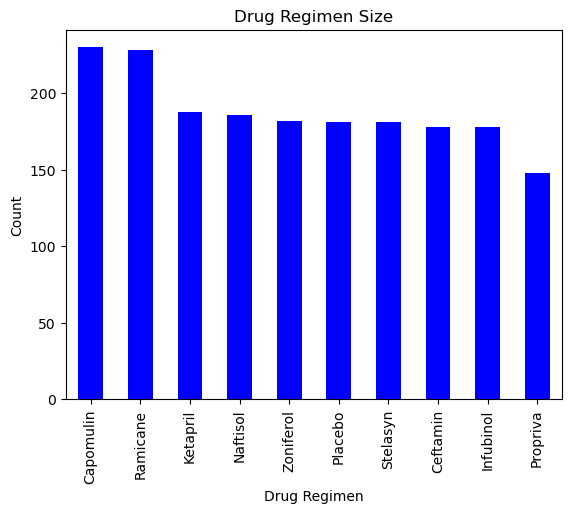

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Regimen Size", ylabel="Count", color="blue")
plt.show()

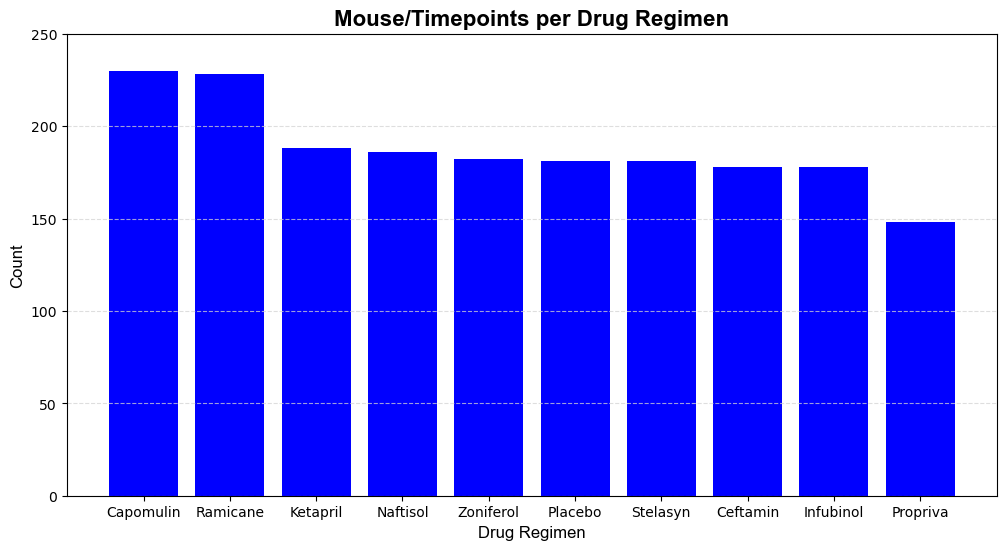

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df = clean_data.groupby("Drug Regimen").size().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(df.index, df.values, color="blue", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Count", fontfamily="Arial", fontsize=12)
plt.title("Mouse/Timepoints per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(0, 250)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [28]:
# Get the unique mice with their gender
counts = clean_data["Sex"].value_counts()
counts

Sex
Male      958
Female    922
Name: count, dtype: int64

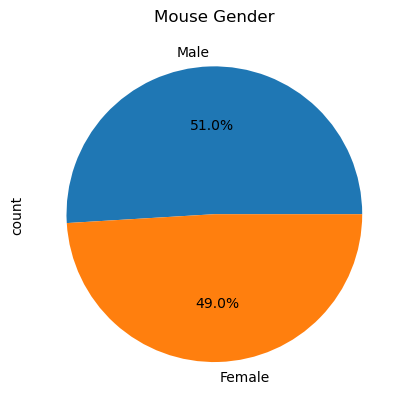

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(kind="pie", title="Mouse Gender", autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Start by getting the last (greatest) timepoint for each mouse
# Group bt Mouse ID to get the max
maxTime = clean_data.groupby("Mouse ID")["Timepoint"].max()
# Convert series to a DataFrame
maxTime = maxTime.reset_index()
maxTime

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = maxTime.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = merged_data["Drug Regimen"].isin(drugs)
merged_data = merged_data.loc[mask].reset_index(drop=True)
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [32]:
# Put treatments into a list for for loop (and later for plot labels) first part
for treatment in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    info = merged_data.loc[merged_data["Drug Regimen"] == treatment]
info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
2,a275,45,62.999356,3,Ceftamin,Female,20,28
10,b447,0,45.000000,0,Ceftamin,Male,2,30
11,b487,25,56.057749,1,Ceftamin,Female,6,28
13,b759,30,55.742829,1,Ceftamin,Female,12,25
23,f436,15,48.722078,2,Ceftamin,Female,3,25
28,h531,5,47.784682,0,Ceftamin,Male,5,27
36,j296,45,61.849023,3,Ceftamin,Female,24,30
39,k210,45,68.923185,3,Ceftamin,Male,15,28
43,l471,45,67.748662,1,Ceftamin,Female,7,28
44,l490,30,57.918381,3,Ceftamin,Male,24,26


In [33]:
#second part 
drugs = merged_data["Drug Regimen"].unique()

In [34]:
# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset
    Tumor_vol_list.append(Tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = Tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = Tumor_vol.loc[(Tumor_vol < lower_bound) | (Tumor_vol > upper_bound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else: 
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o}"
            print(output)

Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None
Ramicane's potential outliers: None
Capomulin's potential outliers: None


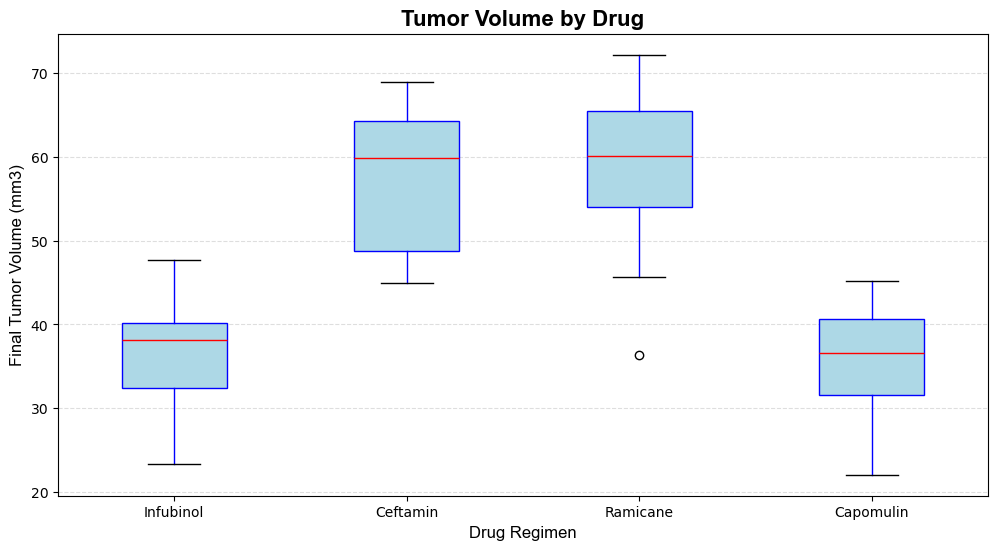

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Group data by Drug Regimen
grouped_data = [group["Tumor Volume (mm3)"].values for _, group in merged_data.groupby("Drug Regimen")]

# Generate a box plot
plt.figure(figsize=(12, 6))

# Create the box plot
plt.boxplot(grouped_data, patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"), 
            medianprops=dict(color="red"), whiskerprops=dict(color="blue"))

# Customize the x-axis with group labels
plt.xticks(range(1, len(merged_data["Drug Regimen"].unique()) + 1), 
           merged_data["Drug Regimen"].unique())

# Customizations
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Final Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Drug", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show the plot
plt.show()

## Line and Scatter Plots

In [36]:
capomulinDf = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulinDf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
224,j246,0,45.0,0,Capomulin,Female,21,21
225,r554,0,45.0,0,Capomulin,Female,8,17
226,s185,0,45.0,0,Capomulin,Female,3,17
227,b742,0,45.0,0,Capomulin,Male,7,21


In [37]:
l509Data = capomulinDf.loc[capomulinDf["Mouse ID"] == "l509"]
l509Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,l509,0,45.000000,0,Capomulin,Male,17,21
251,l509,5,45.851193,0,Capomulin,Male,17,21
535,l509,10,46.759074,0,Capomulin,Male,17,21
873,l509,15,47.488599,1,Capomulin,Male,17,21
973,l509,20,48.070452,2,Capomulin,Male,17,21
1136,l509,25,44.006257,2,Capomulin,Male,17,21
1402,l509,30,44.708055,2,Capomulin,Male,17,21
1487,l509,35,40.207288,2,Capomulin,Male,17,21
1710,l509,40,40.770813,2,Capomulin,Male,17,21
1758,l509,45,41.483008,3,Capomulin,Male,17,21


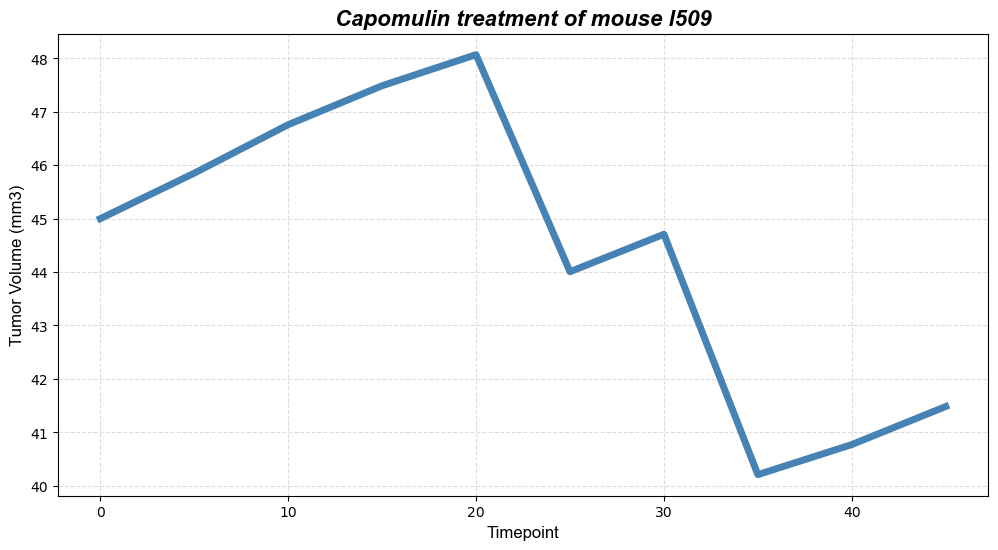

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(l509Data["Timepoint"],l509Data["Tumor Volume (mm3)"], color="steelblue", linewidth=5)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Timepoint", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Capomulin treatment of mouse l509", fontweight="bold", fontsize=16, fontfamily="Arial", fontstyle="italic")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"

df = clean_data.loc[clean_data["Drug Regimen"] == regimen]
capomulin_averageDf = df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})
capomulin_averageDf.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0


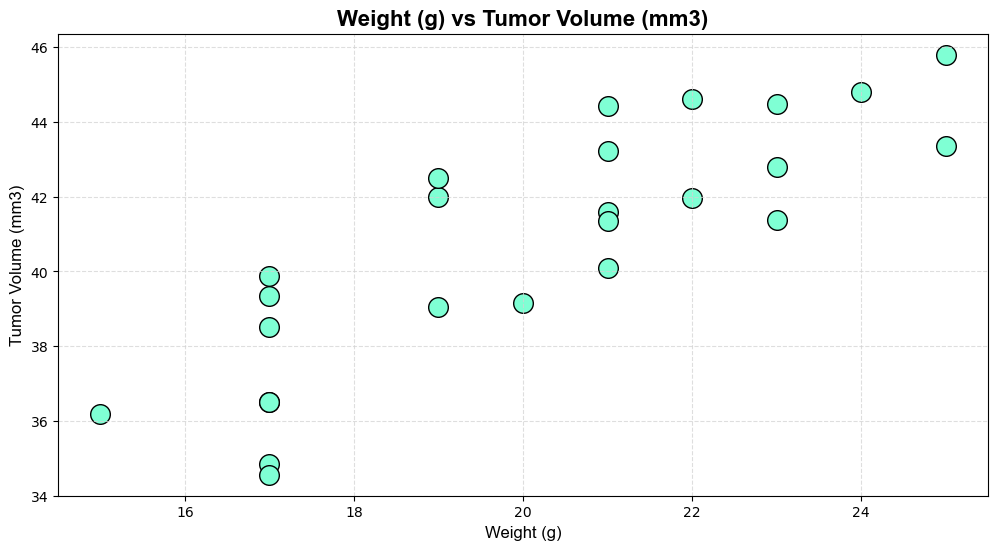

In [40]:
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(capomulin_averageDf["Weight (g)"], capomulin_averageDf["Tumor Volume (mm3)"], color="aquamarine", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight (g) vs Tumor Volume (mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(capomulin_averageDf["Weight (g)"],capomulin_averageDf["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


In [42]:
x_values = capomulin_averageDf["Weight (g)"]
y_values = capomulin_averageDf["Tumor Volume (mm3)"]

(slope,intercept, rvalues, pvalues, stderr) = st.linregress(capomulin_averageDf["Weight (g)"],
                                                            capomulin_averageDf["Tumor Volume (mm3)"])

regressValues = x_values * slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

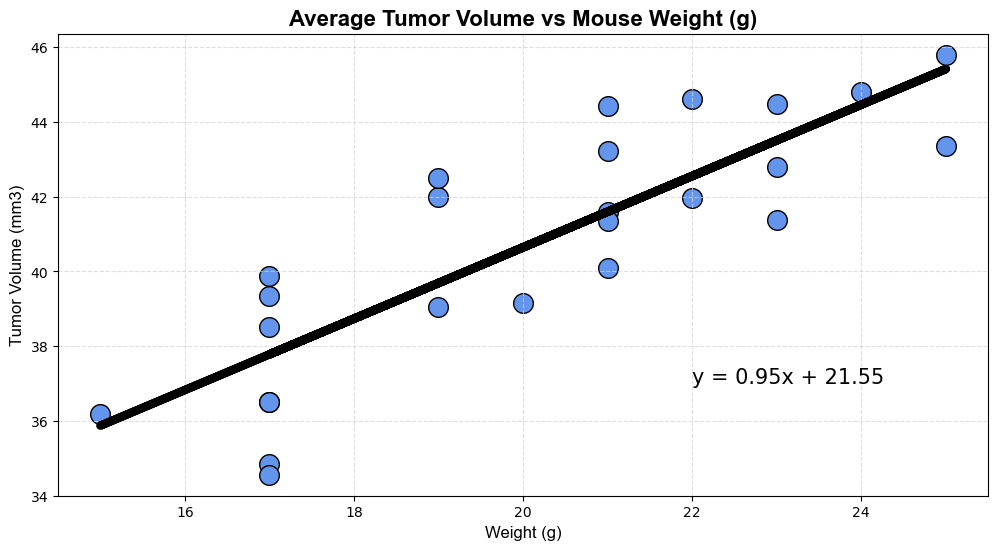

In [43]:
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(capomulin_averageDf["Weight (g)"], capomulin_averageDf["Tumor Volume (mm3)"], color="cornflowerblue", edgecolor="black", s=200)
plt.plot(capomulin_averageDf["Weight (g)"], regressValues, color="black", linewidth=6) # the regression line

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Average Tumor Volume vs Mouse Weight (g)", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Annotate
plt.annotate(lineEQ, (22, 37), fontsize=15, color="black")

# Show/Save the Graph
plt.show()